# <b><u> Project Title : Mobile Price Range Prediction </u></b>

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

#**Data Description** -
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

#**Importing Libraries**

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve


# **Loading the dataset**

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading a data file
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Classification/data_mobile_price_range.csv')

In [ ]:
#It gives Top 5 rows of Dataset 
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#It gives last 5 rows of Dataset
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# It gives Total number of rows and columns of dataset
df.shape

(2000, 21)

**The dataset has 2000 rows and 21 columns**

In [ ]:
#It gives some basic statistical details like percentile, mean, std, max etc.
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Points to note:**
* **We have dichotomous type variables such as blue, wifi, three_g, four_g, dual_sim and touch_screen**
* **WE have some nominal type variables such as n_cores and m_deep.**
* **We have clock_speed, fc, pc, sc_h, sc_w, talktime whose range is low.**
* **We also have other numerical variables whose range is pretty high.**

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#It gives total columns, data types and null count of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#null values sum of target variable ('price_range')
df['price_range'].isnull().sum()

0

In [ ]:
#It counts the value of each class
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

*** Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).***

In [ ]:
df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

*** 1010 mobiles have bluetooth and 990 does not have bluetooth***

In [ ]:
df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

*** italicized text# 1019 mobiles contains dual sim slot and 981 mobiles are not***

In [ ]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

*** 1043 mobiles have four_g facility and 957 are not***

***There are 10 different mobile-depths in the dataset***

In [ ]:
df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

### Dataset contains 8 different cores 

#**Explortory  Data Analys**

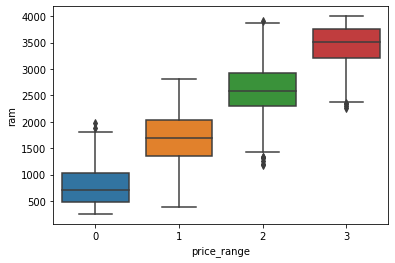

In [ ]:
#Boxplot between ram and price_range
sns.boxplot(y = 'ram' , x = 'price_range',data= df)
plt.show()

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

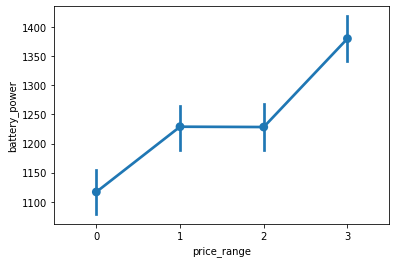

In [ ]:
sns.pointplot(y= 'battery_power', x = 'price_range', data=df)

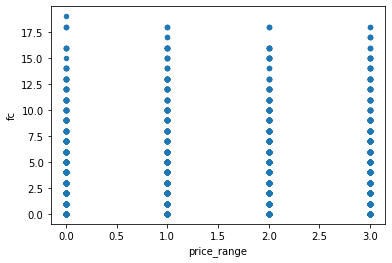

In [ ]:
df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

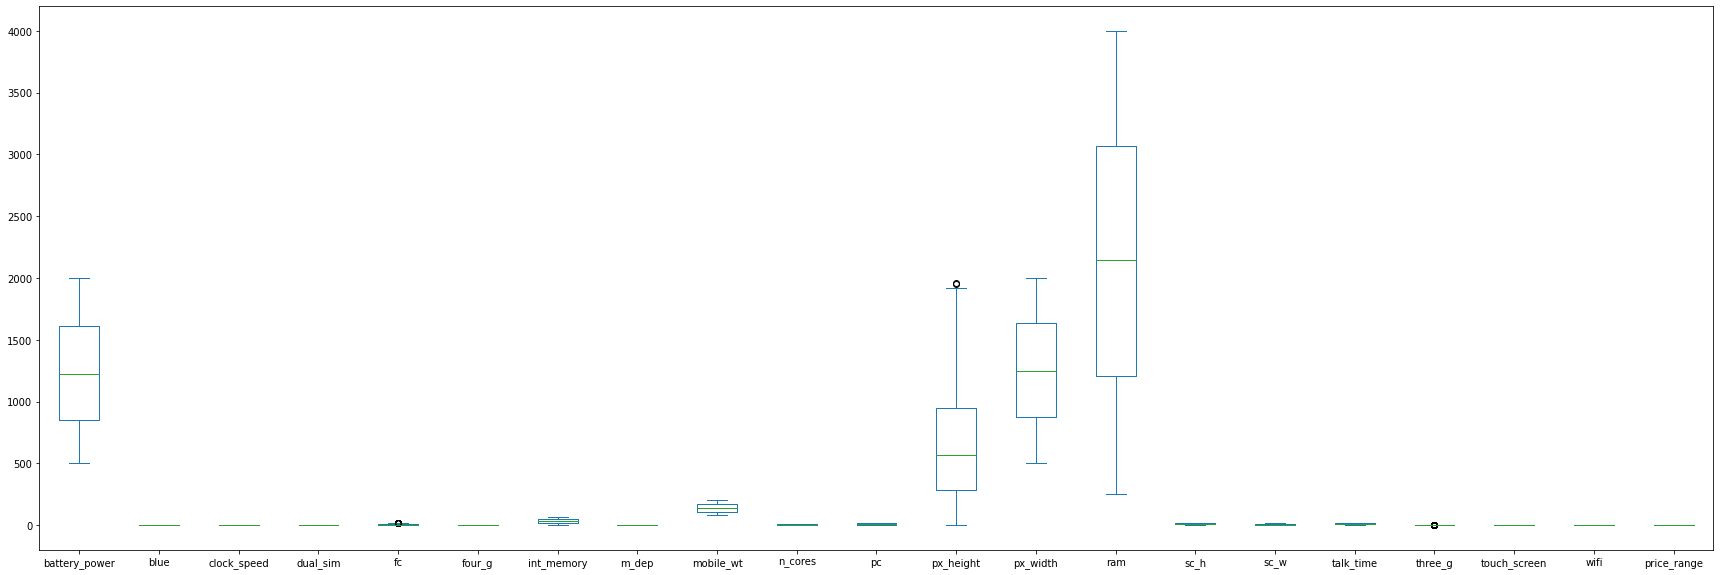

In [ ]:
df.plot(kind='box',figsize=(30,10))
plt.show()
#outlayers

###**Plotting Relation between Price Range & Battery Power**

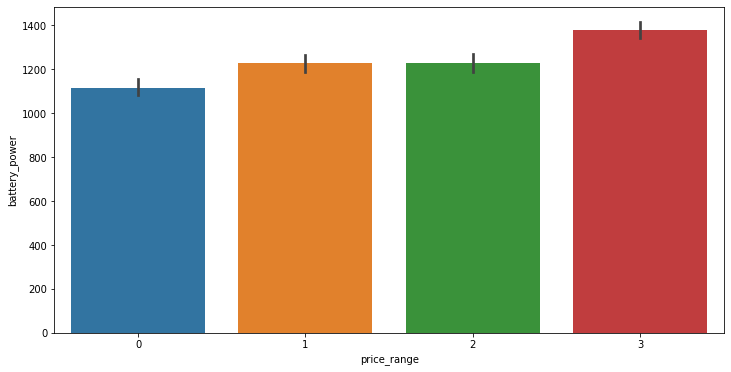

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'battery_power', data=df)
plt.show()

### **Plotting Relation between Price Range & Pixel Height/Width**

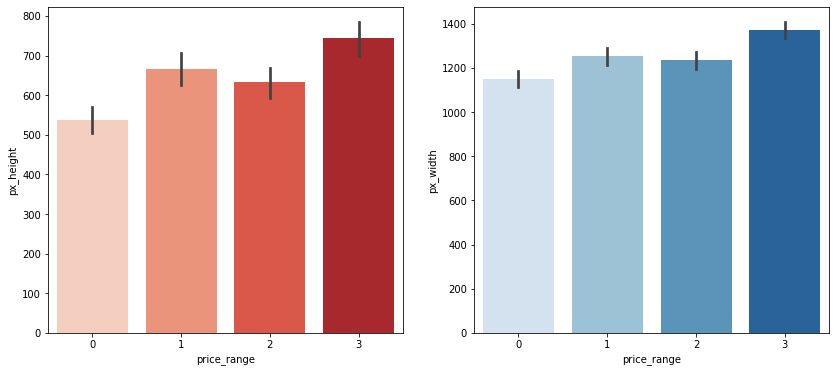

In [ ]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(x = 'price_range', y = 'px_height', data=df, palette = 'Reds')
plt.subplot(1,2,2)
sns.barplot(x = 'price_range', y = 'px_width', data=df , palette = 'Blues')
plt.show()


### **Plotting Relation between Price Range & RAM**

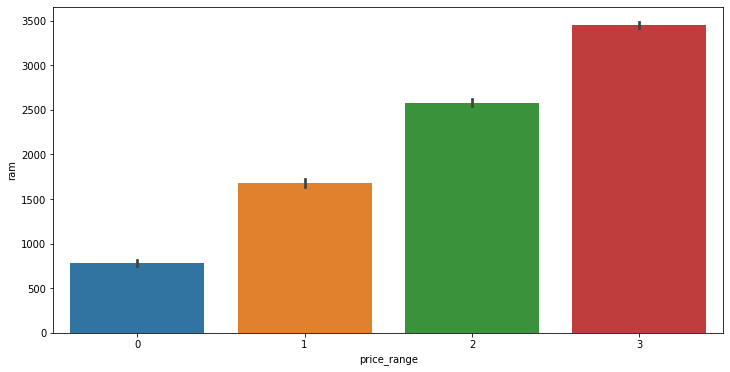

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'ram',data=df)
plt.show()

### **Plotting Relation between Price Range & 3G/4G**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


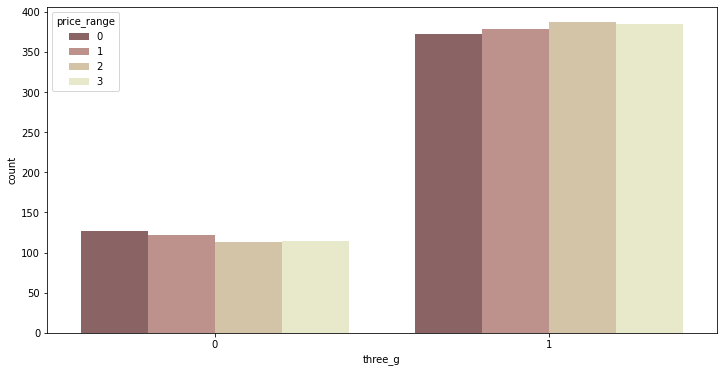

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(df['three_g'] , hue = df['price_range'] , palette = 'pink')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


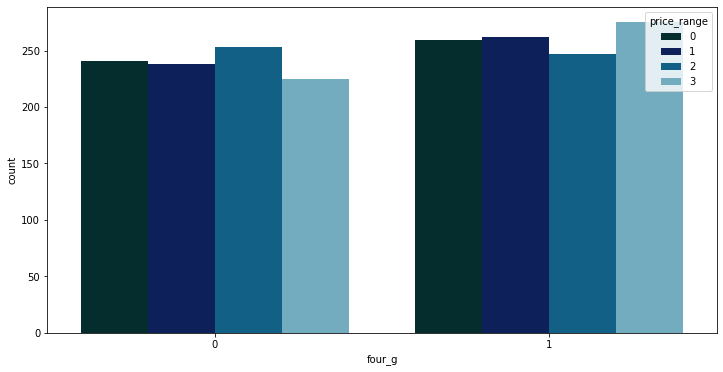

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(df['four_g'] , hue = df['price_range'] , palette = 'ocean')
plt.show()

# **Plotting Relation between Price Range & Memory**

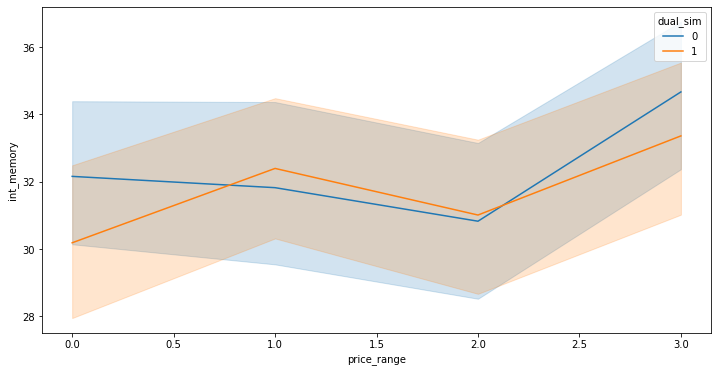

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'price_range' , y = 'int_memory' , data = df , hue = 'dual_sim')
plt.show()

* **There is drastic increase in internal memory for very high prices.**

* **Also there is drastic decrease in mobile weight for very high prices.**

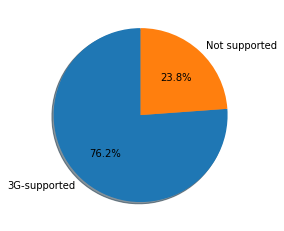

In [ ]:
#percentage of phones which support 3g
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

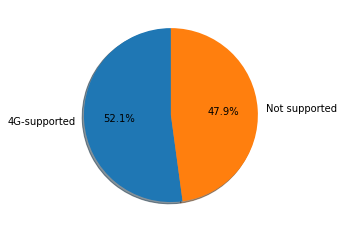

In [ ]:
#percentage of phones which support 4g
labels = ["4G-supported",'Not supported']
values=df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

# `Correlation`

**In this section we will try to find relationship of each variables, their importance and impact on our dependent variable.**

In [ ]:
#correlation
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

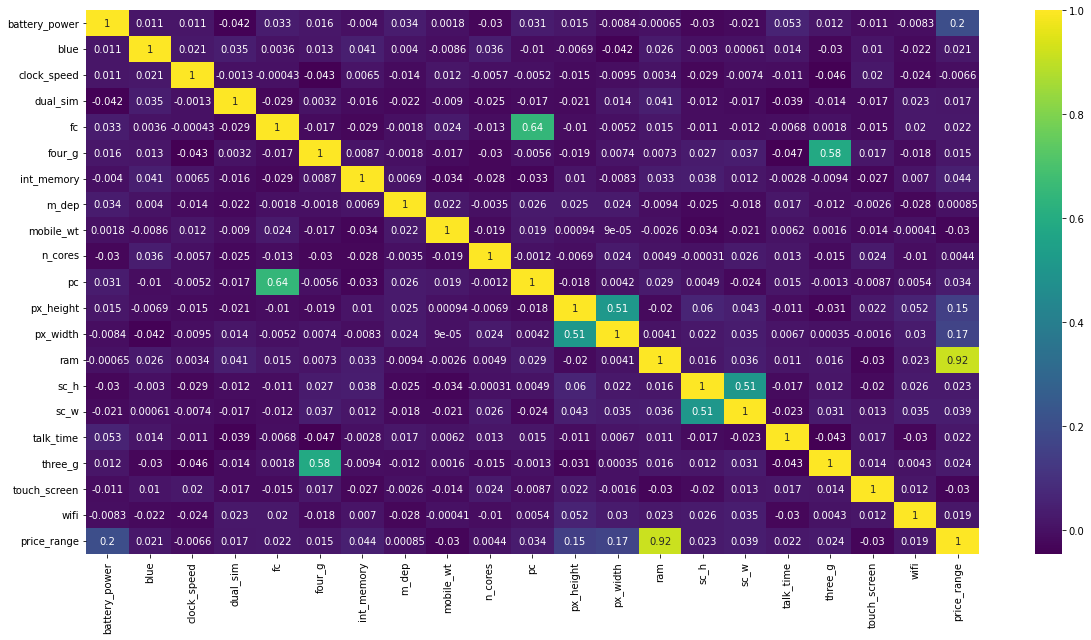

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(df.corr(), cmap='viridis', annot=True)

**Points to note from above heatmap:**

* **pc is correlated with fc.**

* **three_g and four_g are moderately correlated.**

* **sc_h and sc_w are moderately correlated. We will try to change them into a single variable.**

* **px_width and px_height are moderately correlated. We will try to change them into a single variable.**

* **ram is highly correlated with our price range. May be one the most important factor in determining the price.**


# **Splitting the data**

In [ ]:
#independent variables
X = df.drop('price_range',axis=1)

In [ ]:
#dependent variable
y = df['price_range']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(1340, 20)
(660, 20)


# **Fitting Models**

* **In this section we are going to implement various machine learning algorithms to make our predictions. Some of the algorithms we will be using are: Random Forest Classifier, XGBoost Classifier.**

* **The detailed step we will be following are as follows:**

1. **Initial fitting of the model.**

2. **Evaluating the performance of the model using metrics.**

3. **Hyperparameter tuning to improve model performance and to reduce if overfitting occurs.**

#**KNN Classifier**

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

In [ ]:
#calculating metrics
knn_test_score = knn.score(X_test,y_test)
knn_test_score

In [ ]:
knn_train_score = knn.score(X_train,y_train)
knn_train_score

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test,y_test_pred)
matrix

In [ ]:
#plotting confusion matrix for train set
cm = confusion_matrix(y_train, y_train_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
#plotting confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
#predicting 
y_pred_proba = knn.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('Knn Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
#printing classification report for train data
print(classification_report(y_train,y_train_pred))

In [ ]:
#printing classification report for test data
print(classification_report(y_test,y_test_pred))

In [ ]:
y_test_pred

In [ ]:
y_test

#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(X_train,y_train)

In [ ]:
rf_grid.best_estimator_

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
#best parameters for the data
rf_grid.best_params_

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

In [ ]:
# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
len(train_preds)

In [ ]:
train_class_preds

In [ ]:
test_class_preds

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [ ]:
train_cm

In [ ]:
test_cm

In [ ]:
cm = confusion_matrix(y_train,train_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, test_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
print(classification_report(y_train,train_class_preds))

In [ ]:
print(classification_report(y_test,test_class_preds))

#**GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
state = 12  
test_size = 0.33
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

In [ ]:
#Find the best learning rate value 
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

 We're mainly interested in the classifier's accuracy on the validation set, but it looks like a learning rate of 1 gives us the best performance on the validation set and good performance on the training set.

Now we can evaluate the classifier by checking its accuracy and creating a confusion matrix. Let's create a new classifier and specify the best learning rate we discovered.


In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)


print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

In [ ]:
#plotting the confusion matrix for train set
cm = confusion_matrix(y_val, predictions)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_depth=2, random_state=0)
gb_clf2.fit(X_test, y_test)
test_pred = gb_clf2.predict(X_val)


print("Confusion Matrix:")
print(confusion_matrix(y_val, test_pred))

print("Classification Report")
print(classification_report(y_val, test_pred))

In [ ]:
#plotting the confusion matrix for test set
cm = confusion_matrix(y_val, test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

#**XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

In [ ]:
predict = xgb_clf.predict(X_val)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, predict))

print("Classification Report")
print(classification_report(y_val, predict))

In [ ]:
#plotting the confusion matrix for train set
cm = confusion_matrix(y_val, predict)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_test, y_test)

In [ ]:
test_predict = xgb_clf.predict(X_val)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, test_predict))

print("Classification Report")
print(classification_report(y_val, test_predict))

In [ ]:
#plotting the confusion matrix for test set
cm = confusion_matrix(y_val, test_predict)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_model.fit(X_train, y_train)

In [ ]:
# Get the predicted probabilities
train_preds_proba = logistic_model.predict_proba(X_train)
test_preds_proba = logistic_model.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_pred = logistic_model.predict(X_train)
test_class_pred = logistic_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train, train_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, test_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
#predicting 
y_pred_proba = logistic_model.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title(' Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
print(classification_report(y_train,train_class_pred))

In [ ]:
print(classification_report(y_test,test_class_pred))

#**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

In [ ]:
# Get the predicted probabilities
train_prob = decision_tree.predict_proba(X_train)
test_prob = decision_tree.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_predd = decision_tree.predict(X_train)
test_predd = decision_tree.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_predd,y_train)
test_accuracy = accuracy_score(test_predd,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train, train_predd)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
# Get the confusion matrix for both train and test

labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_test, test_predd)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
print(classification_report(y_train,train_predd))

In [ ]:
print(classification_report(y_test,test_predd))

## **Fitting the Support Vector Machine (SVM)**

In [ ]:
# Applying the Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
# Training Score
train_score=svc.score(X_train,y_train)
print('SVM training score:',train_score)

In [ ]:
# Predictions on the train and test data
y_test_svc=svc.predict(X_test)
y_train_svc=svc.predict(X_train)

In [ ]:
# Printing the predicted output
print(y_test_svc)

In [ ]:
# Confusiton matrix for train and test data
cm_train_svc=confusion_matrix(y_train,y_train_svc)
cm_test_svc=confusion_matrix(y_test,y_test_svc)

print( 'Confusion matrix for training set\n',cm_train_svc)
print( 'Confusion matrix for testing set \n',cm_test_svc)

In [ ]:
# Create confusion matrix in tabular form for test data
pd.crosstab(y_test, y_test_svc, rownames=['Actual Class'], colnames=['Predicted Class'])

In [ ]:
# Accuracy score
train_accu3=accuracy_score(y_train,y_train_svc)
test_accu3=accuracy_score(y_test,y_test_svc)
print('Train Set Accuracy:',train_accu3)
print('Test Set Accuracy:',test_accu3)


In [ ]:
# Here, we find the classification report
print(classification_report(y_test,y_test_svc))

## **Hyperparameter Tuning for the Support Vector Machine**

In [ ]:
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                 'kernel': ['rbf']
              } 
              
grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', verbose = 3,cv=5)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# Score and optimal paramters
print('The best hyperparameter for Support Vector Machine :',grid.best_params_)
print('The best score:',grid.best_score_)

In [ ]:
# Optimal Model for Suport vector machine
optimal_clf2=grid.best_estimator_

In [ ]:
# Training Score
score_clf2=optimal_clf2.score(X_train,y_train)
print('The training score for the Support Vector Machine is :',score_clf2)

In [ ]:
# Predictions on the train and test data
y_test_clf2=optimal_clf2.predict(X_test)
y_train_clf2=optimal_clf2.predict(X_train)

In [ ]:
# Printing the first 20 predicted output values of training set
y_train_clf2[:20]


In [ ]:
# Printing the first 20 predicted output values
y_test_clf2[:20]

In [ ]:
# Confusiton matrix for train and test data
cm_train_svch=confusion_matrix(y_train,y_train_clf2)
cm_test_svch=confusion_matrix(y_test,y_test_clf2)

print( 'Confusion matrix for training set\n',cm_train_svch)
print( 'Confusion matrix for testing set \n',cm_test_svch)

In [ ]:
# Confusion matrix for the test data
pd.crosstab(y_test, y_test_clf2, rownames=['Actual Class'], colnames=['Predicted Class'])

In [ ]:
# Here, we find the classification report
print(classification_report(y_test,y_test_clf2))

###**Observations:**


*   The accuracy of the support vector machine is raised by 6% after hyperparameter tuning.
*   The support vector machine's test accuracy score is about 94 percent. This indicates that our model is performing well.
* Before hyperparameter tuning, the test accuracy score is 89 percent, which is also an excellent performance for a model.


#**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#grid parameters
grid_params = {
    'n_neighbors' : [3,5,7,11,13,17,19],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv = 5,
    n_jobs = -1
    )

In [ ]:
gs_results = gs.fit(X_train,y_train)

In [ ]:
#hyperparameters tuned
gs_results

In [ ]:
#best estimator
gs_results.best_estimator_

In [ ]:
#best score
gs_results.best_score_

In [ ]:
#best parameters
gs_results.best_params_

In [ ]:
gs_results2 = gs.fit(X_test,y_test)

In [ ]:
gs_results2

In [ ]:
gs_results2.best_estimator_

In [ ]:
gs_results2.best_score_

In [ ]:
gs_results2.best_params_

In [ ]:
print(classification_report(y_train , gs_results2.predict(X_train)))

In [ ]:
#feature impotance for random forest model
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df

In [ ]:
ab = importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
#plotting feature importance for random forest
sns.barplot(data =ab , x = 'Feature Importance',y = 'Feature')

In [ ]:
#feature importance for xgboost
importances = xgb_clf.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df

In [ ]:
#plotting feature importance for xgboost 
ab = importance_df.sort_values(by=['Feature Importance'],ascending=False)
sns.barplot(data =ab , x = 'Feature Importance',y = 'Feature')

**Observations from the summary plot are:**

* **The most important features in determining the predictions are ram, battery power, px_height.**

* **Higher values of ram are increasing the predicted class.**

* **Higher values of battery power are increasing the predicted class.**

* **Higher values of px_height and px_weight are increasing the predicted class.**

#**Conclusion**

1. Ram , Battery_power features were found to be the most relevant features for 
predicting price range of mobiles and dropping negative correlation features which are clock speed , mobile_wt , touch_screen

2. Kneighbors and Xgboost are given best accuracy score 95% test ,93% train and 91% train , 88% test respectively ,  roc_auc score for kneighbors is 99%

3. Tuning the hyperparameters by GridSearchCV on kneighbors but not getting much difference in results but the best parameters, n_neighbors for train and test are 11 and 17 

4. Logistic regression is giving the less results among all the algorithms

5. So we conclude that kneighbors classifier is giving the best results for these dataset 

6. So we can say that in the price range prediction as the ram and battery_power increases the price range will increase for sure 


